<h3><center>Predicting Stroke Risk</center></h3>   

    
<center>Sam Loyd</center>
<center>June 2021</center> 

In [1]:
# Required Modules
import pandas as pd
from pandas_profiling import ProfileReport

## Data Analysis - EDA

In [2]:
# Pull in data for stroke data 
stroke_df = pd.read_csv("C:\\Users\\Loyd\\Documents\\DSC680\\Project1\\healthcare-dataset-stroke-data.csv")
# Correct data types
stroke_df['stroke'] = stroke_df['stroke'].astype(bool)
stroke_df['hypertension'] = stroke_df['hypertension'].astype(bool)
stroke_df['heart_disease'] = stroke_df['heart_disease'].astype(bool)

In [3]:
# Apply profie and create html report
prof = ProfileReport(stroke_df,title="Pandas Profiling Report - Stroke Data", explorative=True)
prof.to_file(output_file='stroke-pandas-profile-report.html')

# Please see stroke-pandas-profile-report.html for a full analysis 

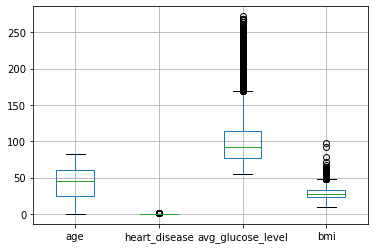

In [4]:
# Pandas-profiling is lacking in outlier analysis visuals so those are included here.

# Box and whisker plots for outlier analysis.
boxplot = stroke_df.boxplot(column=['age', 'heart_disease', 'avg_glucose_level','bmi'])

While outliers were discovered, they were within acceptable ranges according to domain knowledge.
They will not be removed.

## Data Wrangling  
Impute missing values found in the EDA process using pandas-profile report.

In [5]:
stroke_df.bmi.isnull().sum()

201

In [6]:
# Take a deeper look at these
stroke_null = stroke_df[stroke_df.bmi.isnull()]

In [7]:
stroke_null.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,False,False,Yes,Self-employed,Rural,202.21,NaN,never smoked,True
8,27419,Female,59.0,False,False,Yes,Private,Rural,76.15,NaN,Unknown,True
13,8213,Male,78.0,False,True,Yes,Private,Urban,219.84,NaN,Unknown,True
19,25226,Male,57.0,False,True,No,Govt_job,Urban,217.08,NaN,Unknown,True
27,61843,Male,58.0,False,False,Yes,Private,Rural,189.84,NaN,Unknown,True


In [8]:
# about 25%
stroke_null.stroke.value_counts()

False    161
True      40
Name: stroke, dtype: int64

In [9]:
# about 5%
stroke_df.stroke.value_counts()

False    4861
True      249
Name: stroke, dtype: int64

That seems too many data points that have had strokes to throw out given that it is already only 5%.  
As in most cases of missingness there are no good options, but in this case, it does the least harm to impute the mean.

In [10]:
stroke_df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [11]:
# Gather mean for imputation
bmi_mean = stroke_df.bmi.mean()

In [12]:
# Show value
bmi_mean

28.893236911794673

In [13]:
stroke_df = stroke_df.fillna(bmi_mean)

In [14]:
# Contrast effect on statistics
stroke_df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.698018
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.800000
50%,36932.000000,45.000000,91.885000,28.400000
75%,54682.000000,61.000000,114.090000,32.800000
max,72940.000000,82.000000,271.740000,97.600000


In [15]:
# Verify change
stroke_df.bmi.isnull().sum()

0